# Portfolio Assignment week 04
## cost functions

A cost function, also known as an objective function in machine learning and optimization, is a metric that quantifies the difference between the predicted values of a model and the actual values of the target variable. The idea is to reduce this disparity by modifying the model's parameters or weights.

Today I will implement the entire gradient descent technique by hand and execute a cost function and gradient descent on the house pricing data.

In [ ]:
# modules needed for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

# Load data 

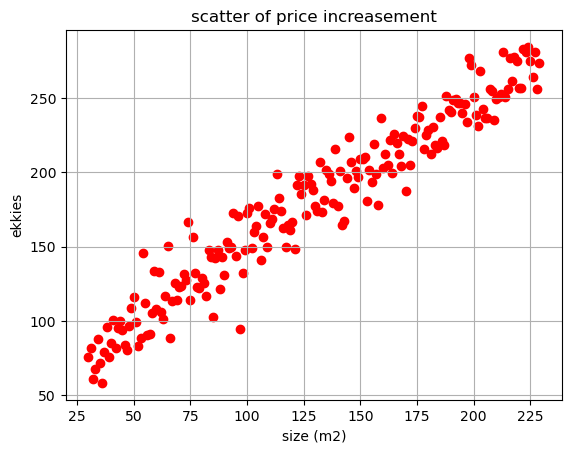

In [11]:
with open("config.yml") as config:
    input_files = yaml.safe_load(config)
    df = pd.read_csv(input_files["price"])

plt.scatter(df["size"],df["price"],color = "red")
plt.title("scatter of price increasement")
plt.xlabel("size (m2)")
plt.ylabel("ekkies") # street for money
plt.grid()
plt.show()

As we can see, the price per m2 is rising. This is similar to what happens in real life. A larger residence is more expensive (ekkies).

below we build a cost function following this plot:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} ( h_\theta(x^{(i)}) - y^{(i)} ) ^2 
$$

- J(theta) : It represents the cost function, which is a function of the model's parameters 
- m: It denotes the number of training examples in your dataset.
- h :  It represents the predicted value of the target variable for the i in i-th training samples x


In [57]:
# compute cost function calcultion
def compute_cost(X,y,theta):

    m = len(y)
    fractor = 1/(2*m)
    h = np.dot(X,theta)

    cost = np.sum((h-y)**2)
    pred_cost = fractor*cost

    return pred_cost

# testing cost function 
In our case the X = the size of the houses
y  = the price

In [38]:
# plotting
# Example usage
X = df["size"]# Assuming two input features
y = df["price"]  # True output values
theta = np.array([0,0])  # Initial parameter values

# Calculate the cost
cost = compute_cost(X, y, theta)
print("Cost:", cost)


(200, 2)
Cost: 17840.780961229346


As we can see the cost is extremly high reason is not very clear on why this is the way it is

# Gradient decent
formula:

$$
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
$$

The gradient decent formula is described above, and as you can see, it uses a portion of the cost function to calculate theta, thus we must modify the compute cost function to work with the gradient decent formula.

In [63]:
def compute_cost2(X,y,theta):
    m = len(y)
    fractor = 1/m
    h = np.dot(X,theta)
    cost = np.sum(h-y)
    pred_cost = fractor*cost

    return pred_cost

In [69]:
# gradient decent with the compute cost function two nested in the for loop
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []
    n = len(X)
    x0 = np.ones((n,1))
    X = np.concatenate((x0,X.values.reshape(-1,1)),axis=1)
    for _ in range(num_iterations):
        h = np.dot(X, theta) 
        error = h - y
        gradient = (alpha / m) * np.dot(X.T, error) 
        theta = theta - gradient  

        cost = compute_cost(X, y, theta)  
        cost_history.append(cost)

    return theta, cost_history


In [67]:
# plotting
# Example usage
X = df["size"]# Assuming two input features
y = df["price"]  # True output values
theta = np.array([0,0])  # Initial parameter values

# Calculate the cost
theta,cost = gradient_descent(X,y,theta,0.00001,10)
print("theta:",theta  , "cost:",cost)

theta: [0.00846863 1.17961561] cost: [-145.2230686155683, -117.77569236827186, -95.84642547213377, -78.32588878154714, -64.32773644190968, -53.14381653141778, -44.20834635728796, -37.06929007015345, -31.365490618518837, -26.808399171517003]


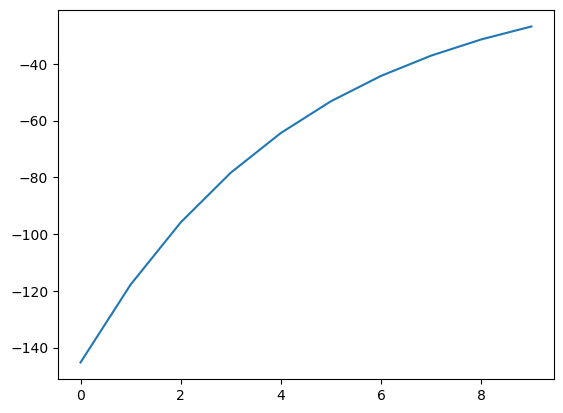

In [68]:
# plotting theta
plt.plot(cost)

# conclusion 

Gradient descent is an optimization procedure that is often used in machine learning to identify the minimum of a differentiable function, such as the cost function. The approach computes the gradient of the cost function with respect to the parameters of the model (in this case, ) and updates the parameters in the opposite direction as the gradient.

The gradient descent updating rule is as follows:
$$
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
$$

Gradient descent seeks the values of theta that minimize the cost function by iteratively updating the parameters in the direction of the negative gradient.

Ideally, the value of the cost function should decrease with each iteration of the optimization process, showing progress toward a better model fit. If the cost function increases with each iteration, this indicates that the learning rate (alpha) is too high, forcing the algorithm to overshoot the minimum.

As a result, the purpose of gradient descent is to minimize the cost function, which leads to improved parameter values and thus better model performance.